In [34]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import netCDF4
import xarray as xr
import math

In [35]:
# import data
data = pd.read_csv('global.1751_2014.csv')
observation = pd.read_csv('co2_annmean_mlo.csv',skiprows=70)
# check data
data

,Year,Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C),Carbon emissions from gas fuel consumption,Carbon emissions from liquid fuel consumption,Carbon emissions from solid fuel consumption,Carbon emissions from cement production,Carbon emissions from gas flaring,Per capita carbon emissions (metric tons of carbon; after 1949 only)
0,Source: Tom Boden (Oak Ridge National Laboratory),Gregg Marland (Appalachian State University),and Bob Andres (Oak Ridge National Laboratory),NaN,NaN,NaN,NaN,NaN
1,1751,3,0,0.0,3.0,0.0,0.0,NaN
2,1752,3,0,0.0,3.0,0.0,0.0,NaN
3,1753,3,0,0.0,3.0,0.0,0.0,NaN
4,1754,3,0,0.0,3.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...
260,2010,9128,1696,3107.0,3812.0,446.0,67.0,1.32
261,2011,9503,1756,3134.0,4055.0,494.0,64.0,1.36
262,2012,9673,1783,3200.0,4106.0,519.0,65.0,1.36
263,2013,9773,1806,3220.0,4126.0,554.0,68.0,1.36


In [36]:
# check data
observation

,1985,346.35,0.12
0,1986,347.61,0.12
1,1987,349.31,0.12
2,1988,351.69,0.12
3,1989,353.20,0.12
4,1990,354.45,0.12
5,1991,355.70,0.12
6,1992,356.54,0.12
7,1993,357.21,0.12
8,1994,358.96,0.12
9,1995,360.97,0.12


In [37]:
# cut the unwanted data  and check data
data = data.iloc[1:,0:2]
data

,Year,Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)
1,1751,3
2,1752,3
3,1753,3
4,1754,3
5,1755,3
...,...,...
260,2010,9128
261,2011,9503
262,2012,9673
263,2013,9773


In [38]:
# select the data from 1987 to 2004 , transform the year to int 
data = data[(data['Year']>='1986')&(data['Year']<='2004')].reset_index(drop=True)
data['Year'] = data['Year'].astype(int)

# check data
data

,Year,Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)
0,1986,5583
1,1987,5725
2,1988,5936
3,1989,6066
4,1990,6074
5,1991,6142
6,1992,6078
7,1993,6070
8,1994,6174
9,1995,6305


In [39]:
# select the data from 1987 to 2004 and check data
obs = observation['346.35'][0:19]
obs

0     347.61
1     349.31
2     351.69
3     353.20
4     354.45
5     355.70
6     356.54
7     357.21
8     358.96
9     360.97
10    362.74
11    363.88
12    366.84
13    368.54
14    369.71
15    371.32
16    373.45
17    375.98
18    377.70
Name: 346.35, dtype: float64

In [40]:
# create new columns for total carbon emission in unit pg, observation and atmospheric CO2 level in ppm and check data
data['Total carbon emission in pg'] = data['Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'].astype(int)/1000
data['observation'] = obs
data['CO2 level in ppm(no buff)'] = 347
data

,Year,Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C),Total carbon emission in pg,observation,CO2 level in ppm(no buff)
0,1986,5583,5.583,347.61,347
1,1987,5725,5.725,349.31,347
2,1988,5936,5.936,351.69,347
3,1989,6066,6.066,353.20,347
4,1990,6074,6.074,354.45,347
5,1991,6142,6.142,355.70,347
6,1992,6078,6.078,356.54,347
7,1993,6070,6.070,357.21,347
8,1994,6174,6.174,358.96,347
9,1995,6305,6.305,360.97,347


In [41]:
# 1.1 
# initialization
# assume that the speed of transfer speed is stationary
k12, k21 = 105/740, 102/900 
# the initial value of CO2 in sea and atmosphere
N1, N2 = 740, 900
# year
year = 1987
# the total molar of material of atmosphere
n0 = 740*10**21/12/347
#  the emission of every year
gamma =data['Total carbon emission in pg']


In [42]:
# start iteration
for year in range(1986,2005):
    # calculate the change of CO2 in sea and atmosphere
    dN1 = -k12*N1 + k21*N2 + gamma[year-1986]
    dN2 = k12*N1 - k21*N2
    # update the CO2 in sea and atmosphere
    N1 += dN1
    N2 += dN2
    # update the CO2 level in ppm, because 1986 is known,so the value does not change
    if year!=1986:
        data['CO2 level in ppm(no buff)'][year-1986] = N1*10**21/12/n0

# initialize value again to avoid the error by repeating the iteration
N1, N2 = 740, 900

# check data
data

C:\Users\malinqiang\AppData\Local\Temp\ipykernel_12688\3868365482.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CO2 level in ppm(no buff)'][year-1986] = N1*10**21/12/n0
C:\Users\malinqiang\AppData\Local\Temp\ipykernel_12688\3868365482.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '349.4765921018992' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data['CO2 level in ppm(no buff)'][year-1986] = N1*10**21/12/n0


,Year,Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C),Total carbon emission in pg,observation,CO2 level in ppm(no buff)
0,1986,5583,5.583,347.61,347.000000
1,1987,5725,5.725,349.31,349.476592
2,1988,5936,5.936,351.69,350.822203
3,1989,6066,6.066,353.20,352.200804
4,1990,6074,6.074,354.45,353.553674
5,1991,6142,6.142,355.70,354.915942
6,1992,6078,6.078,356.54,356.226925
7,1993,6070,6.070,357.21,357.522571
8,1994,6174,6.174,358.96,358.858888
9,1995,6305,6.305,360.97,360.243684


In [43]:
#1.2
# create a new column for CO2 level in ppm with buffer
data['CO2 level in ppm(buff)'] = 347
data

,Year,Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C),Total carbon emission in pg,observation,CO2 level in ppm(no buff),CO2 level in ppm(buff)
0,1986,5583,5.583,347.61,347.000000,347
1,1987,5725,5.725,349.31,349.476592,347
2,1988,5936,5.936,351.69,350.822203,347
3,1989,6066,6.066,353.20,352.200804,347
4,1990,6074,6.074,354.45,353.553674,347
5,1991,6142,6.142,355.70,354.915942,347
6,1992,6078,6.078,356.54,356.226925,347
7,1993,6070,6.070,357.21,357.522571,347
8,1994,6174,6.174,358.96,358.858888,347
9,1995,6305,6.305,360.97,360.243684,347


In [44]:
# initialization
# assume that the speed of transfer speed is stationary
k12, k21 = 105/740, 102/900 
# the initial value of CO2 in sea and atmosphere and and the equilibrium value of CO2 in sea
N1, N2, N20= 740, 900, 821
# start year
year = 1986
# the total molar of material of atmosphere
n0 = 740*10**21/12/347
# the emission of every year
gamma =data['Total carbon emission in pg']

In [45]:
# start iteration
for year in range(1986,2005):
    # calculate the buffer factor
    if year == 1986:
        ksi = 3.69 + 1.86*10**(-2)*data['CO2 level in ppm(buff)'][year-1986] - 1.8*10**(-6)*data['CO2 level in ppm(buff)'][year-1986]**2
    # calculate the change of CO2 in sea and atmosphere
    dN1 = -k12*N1 + k21*(N20 + ksi*(N2 - N20)) + gamma[year-1986]
    dN2 = k12*N1 - k21*(N20 + ksi*(N2 - N20))
    # update the CO2 in sea and atmosphere
    N1 += dN1
    N2 += dN2
    # update the CO2 level in ppm
    if year!=1986:
        data['CO2 level in ppm(buff)'][year-1986] = N1*10**21/12/n0
    # update the buffer factor
    ksi = 3.69 + 1.86*10**(-2)*data['CO2 level in ppm(buff)'][year-1986] - 1.8*10**(-6)*data['CO2 level in ppm(buff)'][year-1986]**2

# initialize value again to avoid the error by repeating the iteration
N1, N2 = 740, 900

# check data
data

C:\Users\malinqiang\AppData\Local\Temp\ipykernel_12688\3858344356.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CO2 level in ppm(buff)'][year-1986] = N1*10**21/12/n0
C:\Users\malinqiang\AppData\Local\Temp\ipykernel_12688\3858344356.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '378.37328975024855' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data['CO2 level in ppm(buff)'][year-1986] = N1*10**21/12/n0


,Year,Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C),Total carbon emission in pg,observation,CO2 level in ppm(no buff),CO2 level in ppm(buff)
0,1986,5583,5.583,347.61,347.000000,347.000000
1,1987,5725,5.725,349.31,349.476592,378.373290
2,1988,5936,5.936,351.69,350.822203,384.121646
3,1989,6066,6.066,353.20,352.200804,385.687094
4,1990,6074,6.074,354.45,353.553674,388.594575
5,1991,6142,6.142,355.70,354.915942,391.102546
6,1992,6078,6.078,356.54,356.226925,393.720567
7,1993,6070,6.070,357.21,357.522571,396.294641
8,1994,6174,6.174,358.96,358.858888,398.934102
9,1995,6305,6.305,360.97,360.243684,401.625967


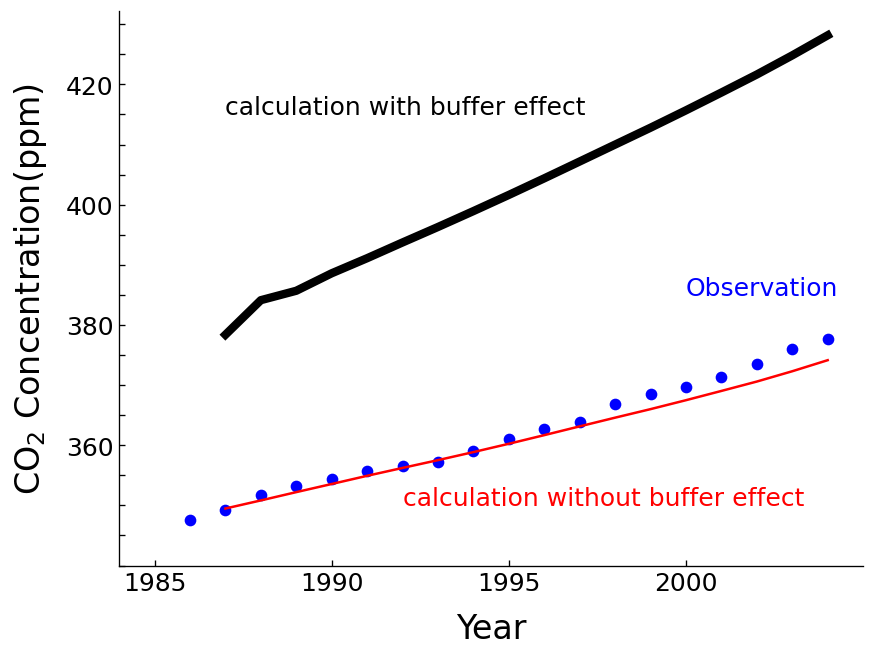

In [46]:
# 1.3
# plot the line and scatter
# creat a figure
plt.figure(figsize=(8,6),dpi=120)
plt.plot(data['Year'],data['observation'],linewidth=0,marker='o',markersize=6,color='blue')
plt.plot(data['Year'][1:],data['CO2 level in ppm(buff)'][1:],linewidth=5,color='black')
plt.plot(data['Year'][1:],data['CO2 level in ppm(no buff)'][1:],color='red')

# set the labels
plt.xlabel('Year',fontsize=20,labelpad=10)
plt.ylabel('CO$_2$ Concentration(ppm)',fontsize=20,labelpad=10)

# set the ticks
plt.xticks(np.arange(1985,2005,5),fontsize=15)
tick = np.arange(340, 431, 5)
tick_labels = [t if t in [360, 380, 400,420] else '' for t in tick]
plt.yticks(tick, tick_labels, fontsize=15)
plt.xlim([1984,2005])
plt.tick_params(axis='both', bottom=True, top=False,direction='in', which='major')


# set the text
plt.text(2000, 385, 'Observation', fontsize=15, color='blue')
plt.text(1987, 415, 'calculation with buffer effect', fontsize=15, color='black')
plt.text(1992, 350, 'calculation without buffer effect', fontsize=15, color='red')

# hide the right and top spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


In [47]:
# bonus
# import data
# global fuel emission data
data = pd.read_csv('global.1751_2014.csv')
# observation data
observation = pd.read_csv('trends-in-atmospheric-carbon-dioxide-concentration.csv')
# emission from land use change data
delta =  pd.read_excel('Global_land-use_flux-1850_2005.xls')

# check data
data

,Year,Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C),Carbon emissions from gas fuel consumption,Carbon emissions from liquid fuel consumption,Carbon emissions from solid fuel consumption,Carbon emissions from cement production,Carbon emissions from gas flaring,Per capita carbon emissions (metric tons of carbon; after 1949 only)
0,Source: Tom Boden (Oak Ridge National Laboratory),Gregg Marland (Appalachian State University),and Bob Andres (Oak Ridge National Laboratory),NaN,NaN,NaN,NaN,NaN
1,1751,3,0,0.0,3.0,0.0,0.0,NaN
2,1752,3,0,0.0,3.0,0.0,0.0,NaN
3,1753,3,0,0.0,3.0,0.0,0.0,NaN
4,1754,3,0,0.0,3.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...
260,2010,9128,1696,3107.0,3812.0,446.0,67.0,1.32
261,2011,9503,1756,3134.0,4055.0,494.0,64.0,1.36
262,2012,9673,1783,3200.0,4106.0,519.0,65.0,1.36
263,2013,9773,1806,3220.0,4126.0,554.0,68.0,1.36


In [48]:
# check data
observation

,Category,Ice Core & Mouna Loa
0,1750,277.00
1,1755,277.20
2,1760,277.60
3,1765,278.00
4,1770,278.60
...,...,...
101,2018,408.72
102,2019,411.65
103,2020,414.21
104,2021,416.41


In [49]:
# check data
delta

,Year,Global,Global in pg
0,1750,200.000,0.200000
1,1751,203.006,0.203006
2,1752,206.012,0.206012
3,1753,209.018,0.209018
4,1754,212.024,0.212024
...,...,...,...
246,1996,1531.300,1.531300
247,1997,1491.300,1.491300
248,1998,1487.200,1.487200
249,1999,1449.200,1.449200


In [50]:
# cut the unwanted data
observation = observation[(observation['Category']>=1750)&(observation['Category']<=2000)]
# check the result
observation

,Category,Ice Core & Mouna Loa
0,1750,277.00
1,1755,277.20
2,1760,277.60
3,1765,278.00
4,1770,278.60
...,...,...
79,1996,362.59
80,1997,363.71
81,1998,366.65
82,1999,368.33


In [51]:
# cut the unwanted data  and check data
data = data.iloc[1:,0:2]
data

,Year,Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)
1,1751,3
2,1752,3
3,1753,3
4,1754,3
5,1755,3
...,...,...
260,2010,9128
261,2011,9503
262,2012,9673
263,2013,9773


In [52]:
# transform the year to int
data['Year'] = data['Year'].astype(int)

In [53]:
#add a row 0f 1750 to correspond to the observation data, assuming that the CO2 emission in 1750 is 3 million metric tons of C
data.loc[-1] = [1750,3]
data = data.sort_values('Year').reset_index(drop=True)

# check data
data

,Year,Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)
0,1750,3
1,1751,3
2,1752,3
3,1753,3
4,1754,3
...,...,...
260,2010,9128
261,2011,9503
262,2012,9673
263,2013,9773


In [54]:
# select the data from 1750 to 2004 and check data
data = data[(data['Year']>=1750)&(data['Year']<=2000)].reset_index(drop=True)

# create new columns for total carbon emission in unit pg
data['Total carbon emission in pg'] = data['Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'].astype(int)/1000

# create new columns for emission from land use change
data['Emission from land use change'] = delta['Global in pg']

# create a new column for CO2 level
# 288 is the result 615^15/12/n0,n0 = 740*10**21/12/347, which is the total molar of material of atmosphere
data['CO2 level in ppm(0.38)'] = 289
data['CO2 level in ppm(0.5)'] = 289
# check data
data

,Year,Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C),Total carbon emission in pg,Emission from land use change,CO2 level in ppm(0.38),CO2 level in ppm(0.5)
0,1750,3,0.003,0.200000,289,289
1,1751,3,0.003,0.203006,289,289
2,1752,3,0.003,0.206012,289,289
3,1753,3,0.003,0.209018,289,289
4,1754,3,0.003,0.212024,289,289
...,...,...,...,...,...,...
246,1996,6448,6.448,1.531300,289,289
247,1997,6556,6.556,1.491300,289,289
248,1998,6576,6.576,1.487200,289,289
249,1999,6561,6.561,1.449200,289,289


In [55]:
# initialization for beta = 0.38
# assume that the speed of transfer speed is stationary
k12 = 60/615
k21, k23, k24 = 60/842, 9/842, 43/842
k32, k34 = 52/9744, 162/9744
k43, k45 = 205/26280, 0.20/26280
k51 = 0.2/90000000
k67 = 62/731
k71 = 62/1328

# the total molar of material of atmosphere
n0 = 740*10**21/12/347

# the initial value of each reservoir,and the equilibrium value of CO2 in sea
N1, N2, N3, N4, N5, N6, N7 = 615, 842, 9744, 26280, 90000000, 731, 1328
N20 = 842

# beta factor
beta = 0.38

# the initial value of the net primary productivity
f0 = 62

# the initial value of co2 concentration in the atmosphere
P0 = 289

# the fuel emission of every year
gamma = data['Total carbon emission in pg']

# the emission from land use change of every year
delta = data['Emission from land use change']

# start year 
year = 1750

In [56]:
# start iteration
for year in range(1751,2001):
    # calculate the buffer factor
    ksi = 3.69 + 1.86*10**(-2)*data['CO2 level in ppm(0.38)'][year-1751] - 1.8*10**(-6)*data['CO2 level in ppm(0.38)'][year-1751]**2
    # calculate co2 flux to the biosphere
    f = f0*(1+beta*math.log(data['CO2 level in ppm(0.38)'][year-1751]/P0))
    # calculate the change of CO2 in sea and atmosphere
    dN1 = -k12*N1 + k21*(N20 + ksi*(N2 - N20)) + gamma[year-1750] - f + delta[year-1750]  + k71*N7 + k51*N5 
    dN2 = k12*N1 - k21*(N20 + ksi*(N2 - N20)) - k23*N2 + k32*N3 - k24*N2
    dN3 = k23*N2 - k32*N3 - k34*N3 + k43*N4
    dN4 = k24*N2  + k34*N3 - k43*N4 - k45*N4
    dN5 = k45*N4 - k51*N5
    dN6 = f - k67*N6 -2*delta[year-1750] 
    dN7 = k67*N6 - k71*N7 + delta[year-1750] 
    # update the CO2 in sea and atmosphere
    N1 += dN1
    N2 += dN2
    N3 += dN3
    N4 += dN4
    N5 += dN5
    N6 += dN6
    N7 += dN7
    # update the CO2 level in ppm
    data['CO2 level in ppm(0.38)'][year-1750] = N1*10**21/12/n0

C:\Users\malinqiang\AppData\Local\Temp\ipykernel_12688\654116977.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CO2 level in ppm(0.38)'][year-1750] = N1*10**21/12/n0
C:\Users\malinqiang\AppData\Local\Temp\ipykernel_12688\654116977.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '288.5755190297297' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data['CO2 level in ppm(0.38)'][year-1750] = N1*10**21/12/n0


In [57]:
# check the result
data

,Year,Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C),Total carbon emission in pg,Emission from land use change,CO2 level in ppm(0.38),CO2 level in ppm(0.5)
0,1750,3,0.003,0.200000,289.000000,289
1,1751,3,0.003,0.203006,288.575519,289
2,1752,3,0.003,0.206012,288.769421,289
3,1753,3,0.003,0.209018,288.953738,289
4,1754,3,0.003,0.212024,289.132713,289
...,...,...,...,...,...,...
246,1996,6448,6.448,1.531300,364.449112,289
247,1997,6556,6.556,1.491300,365.891797,289
248,1998,6576,6.576,1.487200,367.312402,289
249,1999,6561,6.561,1.449200,368.682672,289


In [58]:
# initialization for beta = 0.5
# assume that the speed of transfer speed is stationary
k12 = 60/615
k21, k23, k24 = 60/842, 9/842, 43/842
k32, k34 = 52/9744, 162/9744
k43, k45 = 205/26280, 0.20/26280
k51 = 0.2/90000000
k67 = 62/731
k71 = 62/1328

# the total molar of material of atmosphere
n0 = 740*10**21/12/347

# the initial value of each reservoir,and the equilibrium value of CO2 in sea
N1, N2, N3, N4, N5, N6, N7 = 615, 842, 9744, 26280, 90000000, 731, 1328
N20 = 842

# beta factor
beta = 0.50

# the initial value of the net primary productivity
f0 = 62

# the initial value of co2 concentration in the atmosphere
P0 = 289

# the fuel emission of every year
gamma = data['Total carbon emission in pg']

# the emission from land use change of every year
delta = data['Emission from land use change']

# start year 
year = 1750

In [59]:
# start iteration
for year in range(1751,2001):
    # calculate the buffer factor
    ksi = 3.69 + 1.86*10**(-2)*data['CO2 level in ppm(0.5)'][year-1751] - 1.8*10**(-6)*data['CO2 level in ppm(0.5)'][year-1751]**2
    # calculate co2 flux to the biosphere
    f = f0*(1+beta*math.log(data['CO2 level in ppm(0.5)'][year-1751]/P0))
    # calculate the change of CO2 in sea and atmosphere
    dN1 = -k12*N1 + k21*(N20 + ksi*(N2 - N20)) + gamma[year-1750] - f + delta[year-1750]  + k71*N7 + k51*N5 
    dN2 = k12*N1 - k21*(N20 + ksi*(N2 - N20)) - k23*N2 + k32*N3 - k24*N2
    dN3 = k23*N2 - k32*N3 - k34*N3 + k43*N4
    dN4 = k24*N2  + k34*N3 - k43*N4 - k45*N4
    dN5 = k45*N4 - k51*N5
    dN6 = f - k67*N6 -2*delta[year-1750] 
    dN7 = k67*N6 - k71*N7 + delta[year-1750] 
    # update the CO2 in sea and atmosphere
    N1 += dN1
    N2 += dN2
    N3 += dN3
    N4 += dN4
    N5 += dN5
    N6 += dN6
    N7 += dN7
    # update the CO2 level in ppm
    data['CO2 level in ppm(0.5)'][year-1750] = N1*10**21/12/n0

C:\Users\malinqiang\AppData\Local\Temp\ipykernel_12688\2806340314.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CO2 level in ppm(0.5)'][year-1750] = N1*10**21/12/n0
C:\Users\malinqiang\AppData\Local\Temp\ipykernel_12688\2806340314.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '288.5755190297297' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data['CO2 level in ppm(0.5)'][year-1750] = N1*10**21/12/n0


In [60]:
# check the result
data

,Year,Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C),Total carbon emission in pg,Emission from land use change,CO2 level in ppm(0.38),CO2 level in ppm(0.5)
0,1750,3,0.003,0.200000,289.000000,289.000000
1,1751,3,0.003,0.203006,288.575519,288.575519
2,1752,3,0.003,0.206012,288.769421,288.774549
3,1753,3,0.003,0.209018,288.953738,288.960893
4,1754,3,0.003,0.212024,289.132713,289.139666
...,...,...,...,...,...,...
246,1996,6448,6.448,1.531300,364.449112,357.012547
247,1997,6556,6.556,1.491300,365.891797,358.287788
248,1998,6576,6.576,1.487200,367.312402,359.539858
249,1999,6561,6.561,1.449200,368.682672,360.740899


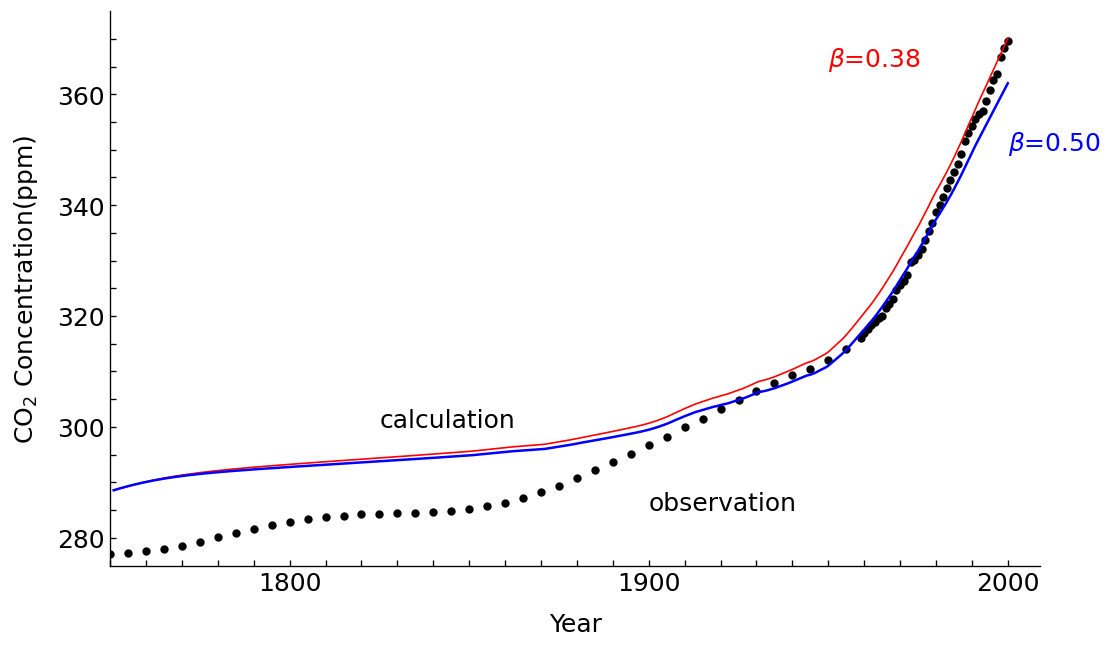

In [61]:
# plot the line and scatter
# plot the line and scatter
# creat a figure
plt.figure(figsize=(10,6),dpi=120)
plt.plot(observation['Category'],observation['Ice Core & Mouna Loa'],linewidth=0,marker='o',markersize=4,color='black')
plt.plot(data['Year'][1:],data['CO2 level in ppm(0.38)'][1:],linewidth=1,color='red')
plt.plot(data['Year'][1:],data['CO2 level in ppm(0.5)'][1:],color='blue')

# set the labels
plt.xlabel('Year',fontsize=15,labelpad=10)
plt.ylabel('CO$_2$ Concentration(ppm)',fontsize=15,labelpad=10)

# set the ticks
tick = np.arange(1750, 2001, 10)
tick_labels = [t if t in np.arange(1800, 2001, 100) else '' for t in tick]
plt.xticks(tick, tick_labels, fontsize=15)
plt.xlim([1750,2009])
tick = np.arange(280, 375, 5)
tick_labels = [t if t in np.arange(280, 361, 20) else '' for t in tick]
plt.yticks(tick, tick_labels, fontsize=15)
plt.ylim([275,375])
plt.tick_params(axis='both', bottom=True, top=False,direction='in', which='major')

# set the text
plt.text(1900, 285, 'observation', fontsize=15, color='black')
plt.text(1825, 300, 'calculation', fontsize=15, color='black')
plt.text(1950, 365, r"$\beta$=0.38", fontsize=15, color='red')
plt.text(2000, 350, r"$\beta$=0.50", fontsize=15, color='blue')
# hide the right and top spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)